In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder

from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import sys
import os

sys.path.append(os.path.abspath("../.."))

from utils.evaluation import Evaluation

from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from collections import Counter

pd.set_option("display.max_columns", None)

In [2]:
path = "../../data/diabetes_processed_dataset.csv"

df = pd.read_csv(path)

## Split and Target Encoding *location*

In [3]:
X = df.drop(['diabetes'], axis = 1)
y = df['diabetes']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
encoder = TargetEncoder(cols=['location'])
X_train['location'] = encoder.fit_transform(X_train['location'], y_train)
X_test['location'] = encoder.transform(X_test['location'])

## Raw Prediction

In [6]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

Accuracy: 0.9690


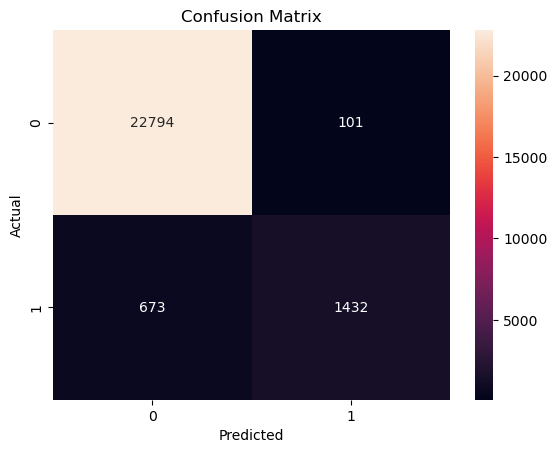

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22895
           1       0.93      0.68      0.79      2105

    accuracy                           0.97     25000
   macro avg       0.95      0.84      0.89     25000
weighted avg       0.97      0.97      0.97     25000



In [7]:
eval = Evaluation()

eval.evaluate_model(y_test, y_pred)

## SMOTE for Class Imbalance

In [8]:
counter = Counter(y_train)
print('Before', counter)

Before Counter({0: 68605, 1: 6395})


In [9]:
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

In [10]:
counter = Counter(y_train_sm)
print('After', counter)

After Counter({0: 68605, 1: 68605})


In [11]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(random_state=42))
])

pipeline.fit(X_train_sm, y_train_sm)

y_pred = pipeline.predict(X_test)

Accuracy: 0.9681


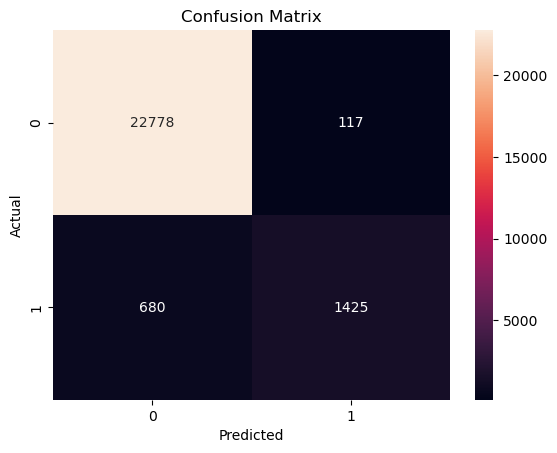

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     22895
           1       0.92      0.68      0.78      2105

    accuracy                           0.97     25000
   macro avg       0.95      0.84      0.88     25000
weighted avg       0.97      0.97      0.97     25000



In [12]:
eval = Evaluation()

eval.evaluate_model(y_test, y_pred)

In [13]:
param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__learning_rate_init': [0.001, 0.01],
    'mlp__max_iter': [200, 400]
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(random_state=42))
])

In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, n_jobs=1, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_sm, y_train_sm)

print(f"Melhores parâmetros:\n {grid_search.best_params_}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time= 1.2min
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  48.2s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  47.3s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time= 1.1min
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  38.8s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time= 1.2min
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time=  49.6s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_in

/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time= 1.7min
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time= 1.6min


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time= 1.7min
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time= 1.6min
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time= 1.1min
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time= 1.9min
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time= 1.6min
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time= 1.8min
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time= 1.7min
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50, 50

/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.01, mlp__max_iter=200; total time=   4.1s


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.01, mlp__max_iter=200; total time=  17.7s
